## CT Scans and Windowing

In [2]:
import pydicom as dicom
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataset = []
for f in sorted(glob.glob("./data/windowing/Lung-CT-Series/*")):
    x = dicom.dcmread(f)
    dataset.append(x)


In [3]:
dataset = sorted(dataset, key=lambda d: d.ImagePositionPatient[2]) # sorted by last attribute as that was the one that was changing the most

# obtain the pixel spacing from the dataset
#  the pixel spacing refers to the physical distance between adjacent pixels in a medical image. It provides information about the size of each pixel and can be important for accurate measurement and analysis of the image data.
PixelSpacing = dataset[0].PixelSpacing 
# The first value is the row spacing in mm, that is the spacing between the centers of adjacent rows, or vertical spacing.

# Print the pixel spacing
print("Pixel Spacing:", PixelSpacing)
# obtain the slice thickness from the dataset

# the slice thickness refers to the distance between adjacent slices in a volumetric image. It indicates the thickness of each slice along the z-axis (depth) and is crucial for accurate interpretation and visualization of 3D medical images.
SliceThickness = dataset[0].SliceThickness 

# calculate the axial aspect ratio based on the values you found above: aspect = (column spacing / row spacing)
ax_aspect =  PixelSpacing[1] / PixelSpacing[0]


shape = list(dataset[0].pixel_array.shape)
shape.append(len(dataset))
img_3D = np.zeros(shape)

for i, s in enumerate(dataset):
    img_3D[: , : , i] = s.pixel_array

Pixel Spacing: [0.761718988418579, 0.761718988418579]


### Perform windowing for lungs, mediastinum and bones
 - Find out what window levels are required for viewing each of the above optimally
 - Note down your observations in the observation cell provided, in it describe what all can you see in each of the 3 views and how it differs from the normal image without windowing

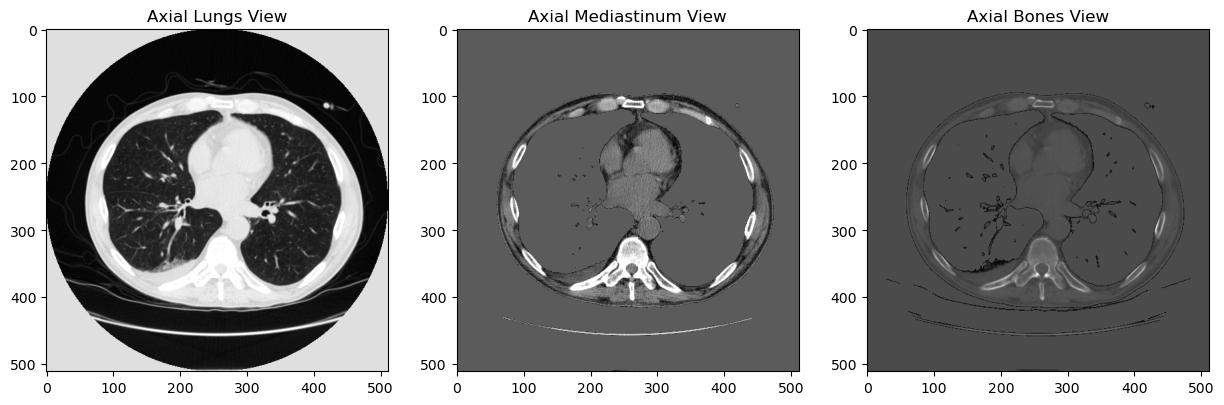

In [4]:
# In the following code, fill in the window level and window width values which will allow you to optimally view the lungs, mediastinum and bones respectively

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

# lungs
# set window parameters
window_level = -600
window_width = 1500
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
# windowed 3D image
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
# set all pixels greater than max visible pixel to 255 in the variable windowed
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255
# Hint: np.interp
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))

# plot the windowed image, you don't need to change anything here
a1 = plt.subplot(1, 3, 1)
plt.title("Axial Lungs View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a1.set_aspect(ax_aspect)

# mediastinum
# set window parameters
window_level = 50
window_width = 350
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
# windowed 3D image
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
# set all pixels greater than max visible pixel to 255 in the variable windowed
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255
# Hint: np.interp
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))

# plot the windowed image, you don't need to change anything here
a2 = plt.subplot(1, 3, 2)
plt.title("Axial Mediastinum View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a2.set_aspect(ax_aspect)

# bones
window_level = 400
# set window parameters
# window_level =
window_width = 1800
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
# windowed 3D image
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
# set all pixels greater than max visible pixel to 255 in the variable windowed
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255
# Hint: np.interp
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))


# plot the windowed image, you don't need to change anything here
a3 = plt.subplot(1, 3, 3)
plt.title("Axial Bones View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a3.set_aspect(ax_aspect)

plt.show()

#### Observations
 - Note down your observations here, double click to edit

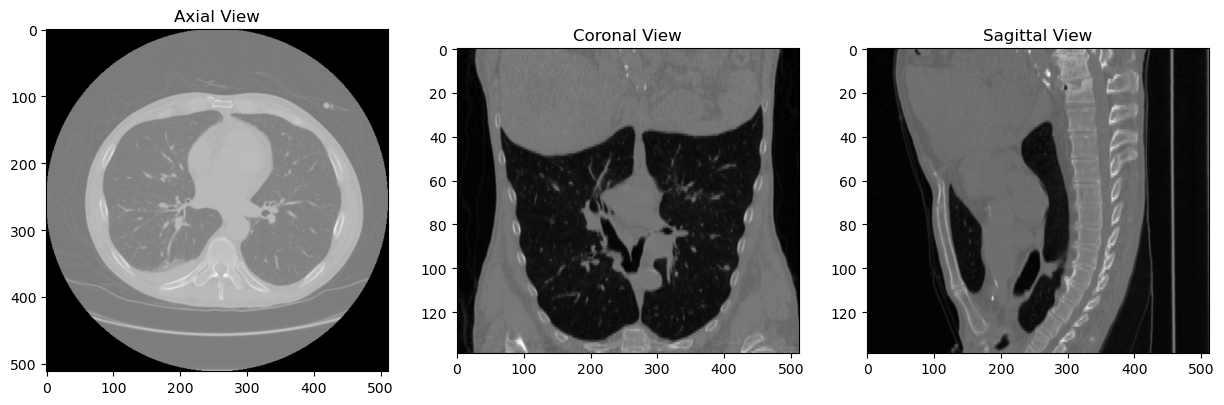

In [5]:
# similar to previous case, calculate axial, coronal and saggital aspect ratios

# axial aspect will be 
ax_aspect = PixelSpacing[1] / PixelSpacing[0]

 # saggital aspect   
sag_aspect =  SliceThickness / PixelSpacing[1]

# coronal aspect
cor_aspect = SliceThickness /  PixelSpacing[0]

# plot axial coronal and saggital slices of a middle slice 
plt.figure(figsize=(15,15))
a1 = plt.subplot(1,3,1)
plt.title("Axial View")

# obtain the middle axial slice from img_3D variable and store it in axial_slice
axial_slice = img_3D[:, :, img_3D.shape[2] // 2]
plt.imshow(axial_slice, cmap="gray")
a1.set_aspect(ax_aspect)


a2 = plt.subplot(1,3,2)
plt.title("Coronal View")
# obtain the middle coronal slice from img_3D variable and store it in coronal_slice (Hint: use transpose after slicing)
coronal_slice = img_3D[img_3D.shape[1] // 2, :, :].transpose()
plt.imshow(coronal_slice, cmap="gray")
a2.set_aspect(cor_aspect)

a3 = plt.subplot(1,3,3)
plt.title("Sagittal View")
# obtain the middle sagittal slice from img_3D variable and store it in sagittal_slice 
sagittal_slice = img_3D[:, img_3D.shape[0] // 2, :].transpose()
plt.imshow(sagittal_slice, cmap="gray")
a3.set_aspect(sag_aspect)

plt.show()


### What view does each of the following correspond to? (i.e., side view or back view, etc.)
 #### Ans. Back
### Which part of the body is visible in the above (eg: legs, arms, chest?)
 #### Ans. Lungs
### Have these images been windowed?
 #### Ans. Yes

 - Answer the above questions. Compare the three views you obtained with the images in the results folder inside data. (double click to edit.) 